<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Pipelines_and_preprocessing_for_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing data - Supervised Learning

## Dealing with categorical features: Dummies

Sci-kit learn will nos accept categorical features by default. 

Need to encode categorical features numerically. Dummy variables.

Always delete a duplicate column because it might be an issue for some models


In [ ]:

import pandas as pd

import numpy as np


link= 'https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'

auto = pd.read_csv(link)

auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


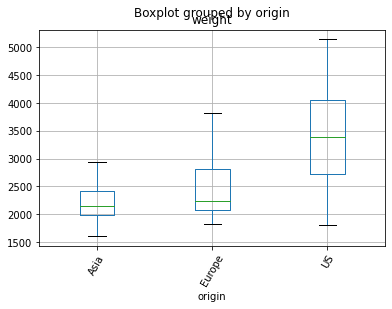

In [ ]:
# Create a boxplot to see weight by origin

auto.boxplot('weight', 'origin', rot=60)

In [ ]:
# Origin is a Categorical Feature where we should convert into dummies.

# Always drop first for ML models
auto = pd.get_dummies(auto, drop_first= True)

auto.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


##  Handling missing data

Supervised Learning






In [ ]:
link = 'https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv'

diabetes = pd.read_csv(link)

diabetes.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# all 0 are Nan values

diabetes.replace(0, np.nan, inplace=True)
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [ ]:
# We now look to the columns that have NaN values.

# How do we deal with that missing data?

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  657 non-null    float64
 1   glucose      763 non-null    float64
 2   diastolic    733 non-null    float64
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
# One way is to drop the rows but we are going to loose half of our data

df= df.dropna()


Another and more robust method is to Impute missing data

That is an educated guess like the mean of that column or another type of inference

### Imputing Missing data with Imputer from Sklearn

In [ ]:
from sklearn.preprocessing import Imputer

# axis=0 we will impute among columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

imp.fit(X)

X = imp.transform(X)

### Scaling with Scale from Scikit learn

In [ ]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

# Building a Pipeline with Imputer and other preprocessing tools

## Imputer and LogisticRegression pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()

# Create each step in a pipeline as a tuple
pipeline = Pipeline[('imputation', imp), 
                    ('logistic_regression'),logreg]

# Next steps like any other model, split, fit, predict and score.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# This score is Accuracy, because our classifier is LogisticRegression()
pipeline.score(X_test,y_test)

## Scale and KNN pipeline

Many models uses distance to make predictions, like KNN.

This if why we need to scale data.

Normalize data:

*   Standardization: subtract the mean and divide by variance. Values have mean 0, std of 1 and variance of 1. or can subtract the minimum and divide by range (minimum zero and maximum 1)
*   Normalize


How significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create each step in a pipeline as a tuple
pipeline = Pipeline[('scaler', StandardScaler()), 
                    ('knn'), KNeighborsClassifier()]

# Next steps like any other model, split, fit, predict and score.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test,y_test)


## Scale and KNN pipeline with hyperparameter tuning with GridSearchCV 

The pipeline goes into a GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create each step in a pipeline as a tuple
pipeline = Pipeline[('scaler', StandardScaler()), 
                    ('knn'), KNeighborsClassifier()]

parameters = {knn__n_neighbors: np.arange(1,50)}

# Next steps like any other model, split, fit, predict and score.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

cv= GridSearchCV(pipeline,param_grid=parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

# This score is Accuracy, because our classifier is a Classifier
cv.score(X_test,y_test)

# We can print best parameters
print(cv.best_params_)

# Classification report for accuracy analysis

print(classification_report(y_test,y_pred))


## Imputer, Scale and regression(ElasticNet) pipeline with hyperparameter tuning with GridSearchCV 

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))